In [ ]:
import ssms
from ssms.basic_simulators import simulator
import os

# print(list(ssms.config.model_config.keys())[:10])
# print(ssms.config.model_config['ddm'])

sim_out = simulator.simulator(
    model="ddm",
    theta={"v": 0.5, "a": 1, "z": 0.5, "t": 0.5},
    n_samples=10,
    no_noise=False,
)

print(sim_out)

In [ ]:
print(sim_out["choices"])

In [ ]:
import matplotlib.pyplot as plt

filt_value = [
    value for value in sim_out["metadata"]["trajectory"] if -1 < value[0] < 1
]  # save it in a list
# for value in sim_out['metadata']['trajectory']:
#     print(value[0])
plt.plot(filt_value)

[-1.21034939 -1.20016782 -1.18972329 -1.17900561 -1.16800406 -1.15670738
 -1.14510367 -1.13318043 -1.12092448 -1.1083219  -1.09535801 -1.08201728
 -1.06828334 -1.05413883 -1.03956539 -1.02454358 -1.00905279 -0.99307115
 -0.97657544 -0.95954099 -0.94194158 -0.92374928 -0.90493436 -0.88546514
 -0.86530778 -0.84442619 -0.82278177 -0.80033323 -0.77703638 -0.75284385
 -0.72770483 -0.70156479 -0.67436513 -0.64604281 -0.61653001 -0.58575365
 -0.55363495 -0.5200889  -0.48502374 -0.44834033 -0.40993152 -0.36968147
 -0.3274649  -0.28314637 -0.23657944 -0.18760598 -0.13605536 -0.08174386
 -0.02447415  0.03596487  0.0997979   0.1672623   0.23860621  0.31408525
  0.39395705  0.47847269  0.56786384  0.6623235   0.76197795  0.86684621
  0.97678237  1.09139464  1.20993446  1.33114912  1.45309688  1.57293786
  1.68675067  1.78949954  1.87540662  1.93913393  1.97810719  1.99533082
  1.99962504  1.9999962   2.          2.          2.          2.
  2.          2.          2.          2.          2.       

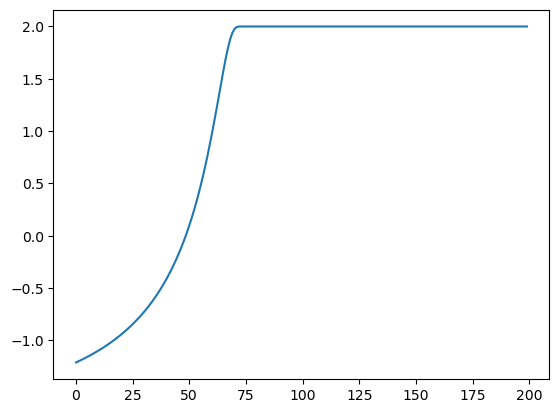

In [11]:
import drift_functions as df
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 200, 1)
p_outer = -2
p_inner = -2
p_target = 2
r = 0.026
sda_initial = 2


v_t_list = []
sda_list = []


v_t = df.attend_drift(
    t=t,
    p_target=p_target,
    p_outer=p_outer,
    p_inner=p_inner,
    r=r,
    sda=sda_initial,
)

new_vt = np.insert(v_t, 0, 0.5)
print(v_t)
# print(new_vt)
plt.plot(v_t)
# v_t_list.append(v_t)
# sda_list.append(sda_initial)
#
# v_t_array = np.array(v_t_list)
# sda_array = np.array(sda_list)


# plt.subplot(2, 1, 1)
# plt.plot(t, v_t_array, label='v_t')
# plt.xlabel('Time')
# plt.ylabel('v_t')
# plt.title('v_t over Time')
# plt.legend()
#
#
# plt.subplot(2, 1, 2)
# plt.plot(t, sda_array, label='sda', color='orange')
# plt.xlabel('Time')
# plt.ylabel('sda')
# plt.title('sda over Time')
# plt.legend()
#
# plt.tight_layout()
# plt.show()

Boundary Dict: {'boundary_params': {}, 'boundary_fun': <function constant at 0x0000021CF0D0D480>, 'boundary_multiplicative': True}
This is the sim param dict: {'max_t': 20, 's': 1.0, 'n_samples': 1000, 'n_trials': 1, 'delta_t': 0.001, 'random_state': None, 'return_option': 'full', 'smooth': True}
[[ 0.80105436  1.        ]
 [ 0.72184879 -1.        ]
 [ 0.95849425 -1.        ]
 ...
 [ 1.56553996  1.        ]
 [ 1.17629015  1.        ]
 [ 0.93114185 -1.        ]]


Text(0, 0.5, 'frequency')

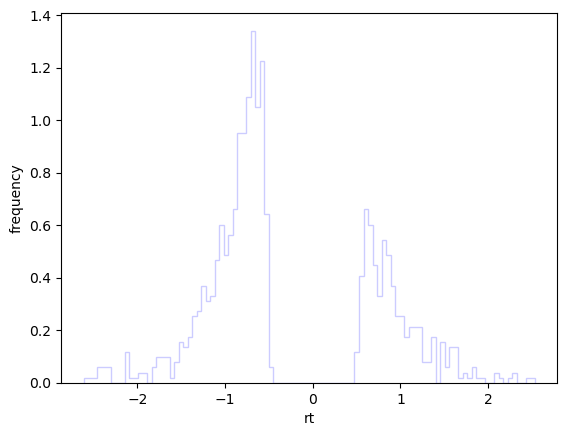

In [16]:
import ssms
import numpy as np
import matplotlib.pyplot as plt
from ssms.basic_simulators import simulator

sim_out2 = simulator.simulator(
    model="shrink_spot",
    theta=[0.7, 0.5, 0.45, 2, 2, 2, 0.01, 1],
    # theta=[1, 0.5, 0.45, 1, -1, -1, 1, 2.6],
    # theta = [0.15, 0.5, 0.45, 0.55, -0.55, -0.55, 1.9, 2],
    # theta = [1.9, 5, 4.5, 5.5, -5.5, -5.5, 0.26, 26],
    n_samples=1000,
    no_noise=False,
    delta_t=0.001,
)
rts = np.squeeze(sim_out2["rts"]).reshape(-1)
responses = np.squeeze(sim_out2["choices"]).reshape(-1)

sims_array = np.column_stack([rts, responses])
print(sims_array)
plt.hist(
    sim_out2["rts"] * sim_out2["choices"],
    bins=100,
    histtype="step",
    label="simulations",
    color="blue",
    alpha=0.2,
    density=True,
)
plt.xlabel("rt")
plt.ylabel("frequency")

In [ ]:
help(simulator.simulator)

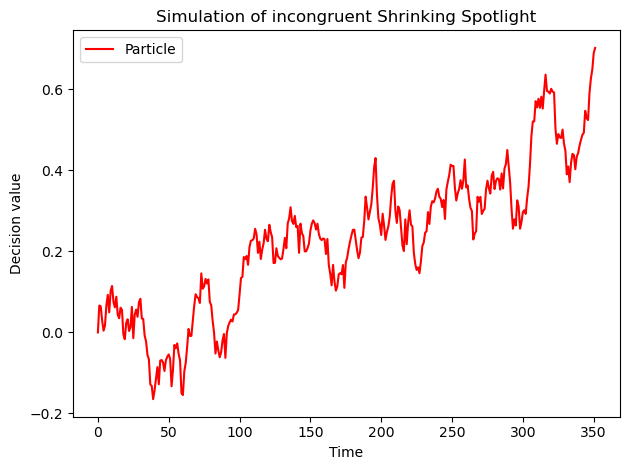

In [17]:
import matplotlib.pyplot as plt

filt_value = [
    value for value in sim_out2["metadata"]["trajectory"] if -1 < value[0] < 1
]  # save it in a list
# plt.plot(v_t)
plt.plot(filt_value, color="red", label="Particle")
plt.title("Simulation of incongruent Shrinking Spotlight")
plt.xlabel("Time")
plt.ylabel("Decision value")
# plt.axhline(y=1, label="choice up", color="black", linestyle="--")
# plt.axhline(y=-1, label="choice down", color="black", linestyle="--")
# plt.axhline(y=0, color="black")
# plt.axvline(x=0.5, label="non-decision time", color="black", linestyle="-")
plt.tight_layout()
plt.legend()

In [ ]:
from ssms.basic_simulators import simulator

sim_out2 = simulator.simulator(
    model="shrink_spot",
    theta={"v": 0, "a": 1, "z": 0.5, "t": 0.5},
    n_samples=1000,
    no_noise=False,
)

print(np.mean(sim_out2["rts"]))

In [ ]:
import ssms

list(ssms.config.model_config.keys())[:]

In [ ]:
import drift_functions as df
import numpy as np
import matplotlib.pyplot as plt


gamma_drift = df.gamma_drift(t=np.arange(0, 10, 0.001), shape=2, scale=0.01, c=1.5)
plt.plot(gamma_drift)

In [10]:
# simulating multiple random parameter sets for shrinking spotlight
import ssms
from ssms.basic_simulators import simulator
import numpy as np


model_config = ssms.config.model_config["shrink_spot"]
print(model_config)
parameter_list = []
for _ in range(5):
    theta = np.float32(
        np.random.uniform(
            low=model_config["param_bounds"][0],
            high=model_config["param_bounds"][1],
        )
    )
    parameter_list.append(theta)

{'name': 'shrink_spot', 'params': ['a', 'z', 't', 'p_target', 'p_outer', 'p_inner', 'r', 'sda'], 'param_bounds': [[0.3, 0.1, 0.001, -1, -1, -1, 0.001, 0.001], [3.0, 0.9, 2.0, 1, 1, 1, 3, 3]], 'boundary_name': 'constant', 'boundary': <function constant at 0x0000019CE37415A0>, 'drift_name': 'attend_drift', 'drift_fun': <function attend_drift at 0x0000019CFB8C48B0>, 'n_params': 8, 'default_params': [0, 1.0, 0.5, 0.25, 1, -1, -1, 0.05, 2], 'nchoices': 2, 'simulator': <cyfunction ddm_flex_no_v at 0x0000019CFB7FF440>}
